In [3]:
import os, shutil
original_dataset_dir = '/OneDrive/Desktop/TB_Chest_Radiography_Database'
base_dir = 'Normal_and_Tuberculosis '
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_Normal_dir = os.path.join(train_dir, 'Normal')
os.mkdir(train_Normal_dir)
train_Tuberculosis_dir = os.path.join(train_dir, 'Tuberculosis')
os.mkdir(train_Tuberculosis_dir)
validation_Normal_dir = os.path.join(validation_dir, 'Normal')
os.mkdir(validation_Normal_dir)
validation_Tuberculosis_dir = os.path.join(validation_dir, 'Tuberculosis')
os.mkdir(validation_Tuberculosis_dir)
test_Normal_dir = os.path.join(test_dir, 'Normal')
os.mkdir(test_Normal_dir)
test_Tuberculosis_dir = os.path.join(test_dir, 'Tuberculosis')
os.mkdir(test_Tuberculosis_dir)


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2700 images belonging to 2 classes.
Found 1700 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 106s 1s/step - loss: 0.4136 - acc: 0.8125 - val_loss: 0.3435 - val_acc: 0.7950
Epoch 2/100
100/100 [==============================] - 77s 772ms/step - loss: 0.2371 - acc: 0.8960 - val_loss: 0.2670 - val_acc: 0.8560
Epoch 3/100
100/100 [==============================] - 76s 756ms/step - loss: 0.2008 - acc: 0.9230 - val_loss: 0.2099 - val_acc: 0.9120
Epoch 4/100
100/100 [==============================] - 75s 747ms/step - loss: 0.1657 - acc: 0.9330 - val_loss: 0.2151 - val_acc: 0.9080
Epoch 5/100
100/100 [==============================] - 74s 736ms/step - loss: 0.1522 - acc: 0.9385 - val_loss: 0.1506 - val_acc: 0.9480
Epoch 6/100
100/100 [==============================] - 73s 733ms/step - loss: 0.1236 - acc: 0.9545 - val_loss: 0.1483 - val_acc: 0.9460
Epoch 7/100
100/100 [==============================] - 73s 733ms/step - loss: 0.1278 - acc: 0.9515 - val_loss: 0.1389 - val_acc: 0.9450
Epoch 8/100
100/100 [=============================

Epoch 61/100
100/100 [==============================] - 74s 744ms/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0809 - val_acc: 0.9880
Epoch 62/100
100/100 [==============================] - 74s 744ms/step - loss: 0.0063 - acc: 0.9985 - val_loss: 0.0261 - val_acc: 0.9940
Epoch 63/100
100/100 [==============================] - 73s 732ms/step - loss: 2.0107e-04 - acc: 1.0000 - val_loss: 0.0575 - val_acc: 0.9910
Epoch 64/100
100/100 [==============================] - 74s 736ms/step - loss: 9.0693e-04 - acc: 0.9995 - val_loss: 0.0585 - val_acc: 0.9930
Epoch 65/100
100/100 [==============================] - 74s 742ms/step - loss: 0.0016 - acc: 0.9990 - val_loss: 0.0245 - val_acc: 0.9920
Epoch 66/100
100/100 [==============================] - 73s 731ms/step - loss: 0.0023 - acc: 0.9990 - val_loss: 0.0421 - val_acc: 0.9900
Epoch 67/100
100/100 [==============================] - 76s 759ms/step - loss: 0.0027 - acc: 0.9985 - val_loss: 0.1426 - val_acc: 0.9840
Epoch 68/100
100/100 [===========

In [17]:
model.save('Tuberculosis_Detection_using_cnn.h5')

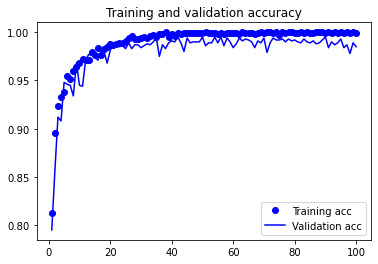

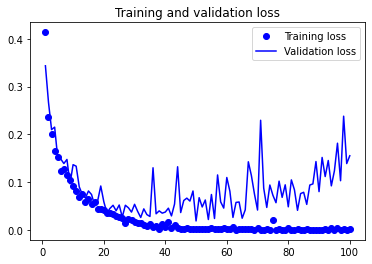

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()